# Exploratory stats

## Data import

Detailed edit data are located in detailed_data folder in three files, one for each of the topics analysed.

In [16]:
## Setup + data import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import itertools

wikiData_US = pd.read_csv("../data/detailed_data/detailedEdits_2024-06-13-11-03.csv")
wikiData_US['topic'] = 'US_Civil_War'

wikiData_UA = pd.read_csv("../data/detailed_data/detailedEdits_2024-06-13-22-44.csv")
wikiData_UA['topic'] = 'Ukraine'

wikiData_IP = pd.read_csv("../data/detailed_data/detailedEdits_2024-06-14-11-41.csv")
wikiData_IP['topic'] = 'Israel/Palestine'


wikiData_all = pd.concat([wikiData_UA, wikiData_US, wikiData_IP])[['user', 'timestamp', 'size', 'reverted', 'reversion', 'topic', 'article', 'language', 'total_edits', 'article_edits']].drop_duplicates()
wikiData_all['ratio_edits'] = (wikiData_all['article_edits']/wikiData_all['total_edits']).replace(np.inf, 1.01)

wikiData_all['timestamp'] = pd.to_datetime(wikiData_all['timestamp'])
wikiData_all['month'] = wikiData_all['timestamp'].dt.month
wikiData_all['year'] = wikiData_all['timestamp'].dt.year

wikiData_all

,user,timestamp,size,reverted,reversion,topic,article,language,total_edits,article_edits,ratio_edits,month,year
92202,Triggerhippie4,2018-01-05 12:10:02,84050,0,1,Israel/Palestine,Hebrew_language,en,20341,43.0,0.002114,1,2018
12022,Karl.i.biased,2018-01-06 01:32:19,80177,0,1,Ukraine,Stepan_Bandera,en,1606,35.0,0.021793,1,2018
47159,Acroterion,2018-01-07 03:49:51,84121,0,1,US_Civil_War,James_Longstreet,en,226049,1.0,0.000004,1,2018
147032,Андрей Романенко,2018-01-07 14:55:57,107356,0,1,Ukraine,Ukrainian_People's_Republic,ru,118938,2.0,0.000017,1,2018
149906,Юрий Владимирович Л.,2018-01-07 17:16:16,189164,0,1,Ukraine,Nikolai_Gogol,ru,85745,2.0,0.000023,1,2018


In [17]:
print(len(wikiData_all['article'].unique()))
wikiData_all[['article', 'topic', 'language']].drop_duplicates().groupby(['topic', 'language']).size()


131


topic             language
Israel/Palestine  ar          42
                  de          34
                  en          43
US_Civil_War      de          38
                  en          45
Ukraine           de          41
                  en          43
                  ru          42
                  uk          43
dtype: int64

In [20]:
grouped_lang_article = wikiData_all.groupby(['topic', 'language', 'article']).size().reset_index(name='count').sort_values(by='count', ascending=False)
grouped_lang_article.head(10)

,topic,language,article,count
195,US_Civil_War,en,Ulysses_S._Grant,21238
157,US_Civil_War,en,Abraham_Lincoln,18354
181,US_Civil_War,en,Ku_Klux_Klan,12267
190,US_Civil_War,en,Slavery_in_the_United_States,11131
165,US_Civil_War,en,Confederate_States_of_America,10591
185,US_Civil_War,en,Reconstruction_era,8768
172,US_Civil_War,en,Jefferson_Davis,8664
187,US_Civil_War,en,Robert_E._Lee,8471
248,Ukraine,en,Holodomor,8137
174,US_Civil_War,en,John_Brown_(abolitionist),7650


C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)
C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)
C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)
C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)
C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)


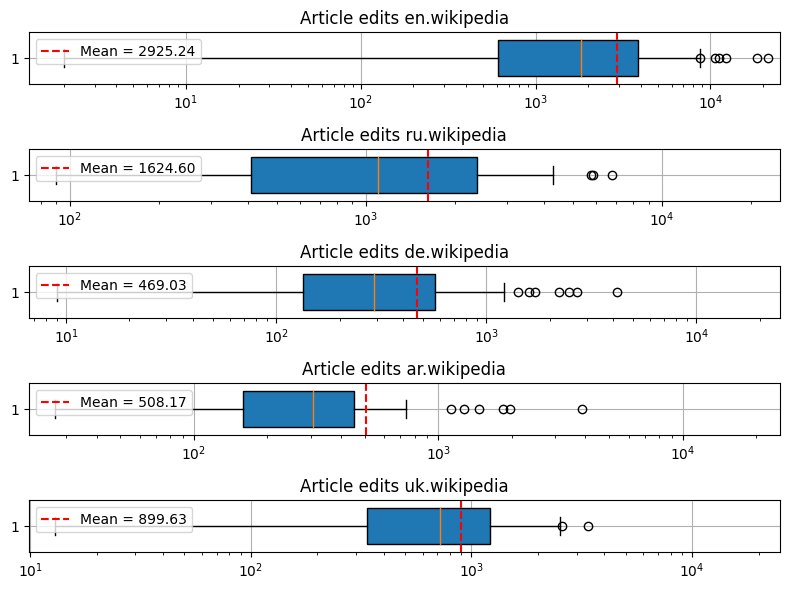

C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)
C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)
C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:50: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)


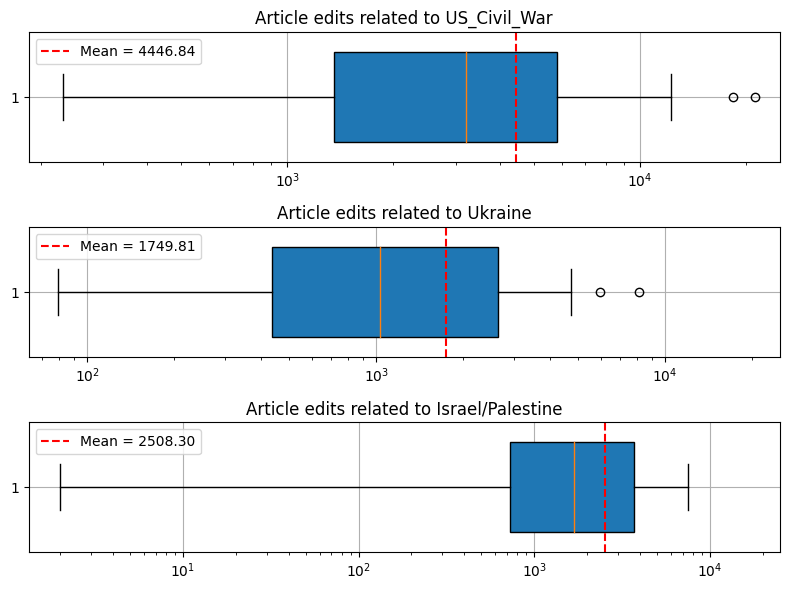

C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:80: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)
C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:80: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)
C:\Users\errik\AppData\Local\Temp\ipykernel_8056\366113431.py:80: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.setp(ax, xlim=custom_xlim)


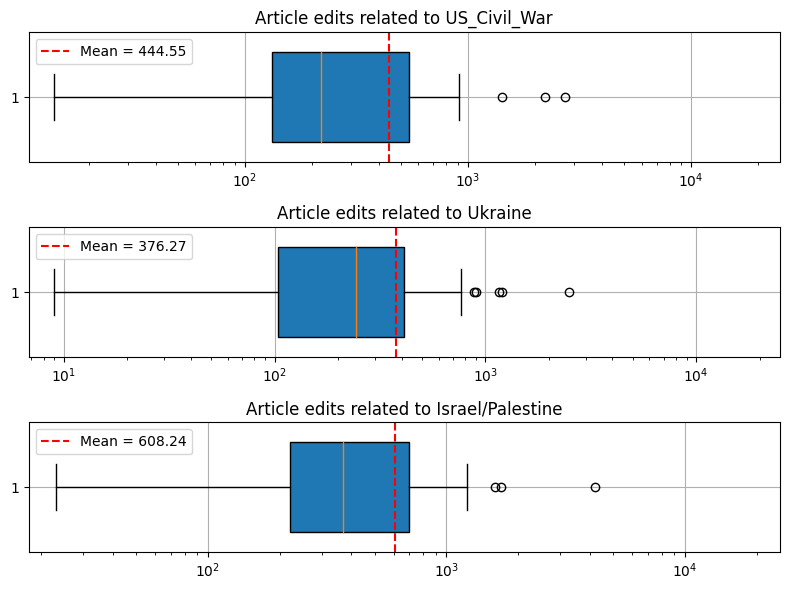

In [63]:
plt.figure(figsize=(8, 6))  # Adjust figure size if necessary

langs = grouped_lang_article['language'].unique()

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (0, 25000)

# Setting the values for all axes.

for i in range(0, len(langs)):

    ax = plt.subplot(len(langs), 1, i+1)
    df = grouped_lang_article[grouped_lang_article['language'] == langs[i]]
    
    plt.boxplot(df['count'], vert=False, widths=0.7, patch_artist=True)
    plt.xscale('log')
    # Add mean line for each category
    mean_count = df['count'].mean()
    plt.axvline(x=mean_count, color='r', linestyle='--', label=f'Mean = {mean_count:.2f}')
    plt.setp(ax, xlim=custom_xlim)
    
    # Labeling and customization for each subplot
      # Set logarithmic scale for the x-axis
    plt.title(f'Article edits {langs[i]}.wikipedia')
    plt.legend(loc='upper left')  # Show legend with mean value
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))  # Adjust figure size if necessary

topics = grouped_lang_article['topic'].unique()

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (0, 25000)

# Setting the values for all axes.

for i in range(0, len(topics)):

    ax = plt.subplot(len(topics), 1, i+1)
    df = grouped_lang_article[(grouped_lang_article['language'] == 'en') & (grouped_lang_article['topic'] == topics[i])]
    
    plt.boxplot(df['count'], vert=False, widths=0.7, patch_artist=True)
    plt.xscale('log')
    # Add mean line for each category
    mean_count = df['count'].mean()
    plt.axvline(x=mean_count, color='r', linestyle='--', label=f'Mean = {mean_count:.2f}')
    plt.setp(ax, xlim=custom_xlim)
    
    # Labeling and customization for each subplot
      # Set logarithmic scale for the x-axis
    plt.title(f'Article edits related to {topics[i]}')
    plt.legend(loc='upper left')  # Show legend with mean value
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))  # Adjust figure size if necessary

topics = grouped_lang_article['topic'].unique()

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (0, 25000)

# Setting the values for all axes.

for i in range(0, len(topics)):

    ax = plt.subplot(len(topics), 1, i+1)
    df = grouped_lang_article[(grouped_lang_article['language'] == 'de') & (grouped_lang_article['topic'] == topics[i])]
    
    plt.boxplot(df['count'], vert=False, widths=0.7, patch_artist=True)
    plt.xscale('log')
    # Add mean line for each category
    mean_count = df['count'].mean()
    plt.axvline(x=mean_count, color='r', linestyle='--', label=f'Mean = {mean_count:.2f}')
    plt.setp(ax, xlim=custom_xlim)
    
    # Labeling and customization for each subplot
      # Set logarithmic scale for the x-axis
    plt.title(f'Article edits related to {topics[i]}')
    plt.legend(loc='upper left')  # Show legend with mean value
    plt.grid(True)

plt.tight_layout()
plt.show()


SyntaxError: f-string: unmatched '[' (2377128494.py, line 9)